# Mars Weather Project
## Requirements
* selenium
* pandas
* matplotlib
* numpy (maybe)


In [80]:
import pandas as pd
from pandas import DataFrame, Series
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline  

import numpy as np




In [81]:
try:
    %run -i "getData.py"
    print("successfully updated Mars weather data")
except:
    print("warning: could not update Mars weather data")

file was written
successfully updated Mars weather data


In [82]:
#grab weather table from html file
html = pd.read_html("mars_weather.html", attrs={'id': 'weather_observation'}) 
html


[                Date                Sol Air Temperature (°F | °C)          \
   Unnamed: 0_level_1 Unnamed: 1_level_1                      Max.    Min.   
 0       Apr. 7, 2021               3082                       9°F  -105°F   
 1       Apr. 6, 2021               3081                       3°F  -105°F   
 2       Apr. 5, 2021               3080                      -2°F  -105°F   
 3       Apr. 4, 2021               3079                      10°F  -101°F   
 4       Apr. 3, 2021               3078                      12°F   -99°F   
 5       Apr. 2, 2021               3077                      10°F  -101°F   
 6       Apr. 1, 2021               3076                      10°F   -99°F   
 
        Pressure (Pa)            Sunrise             Sunset  
   Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1  
 0                850              06:25              18:17  
 1                850              06:25              18:17  
 2                850              06:25        

In [83]:
 htmlTable = html[0]
 htmlTable

Date                Sol Air Temperature (°F | °C)          \
  Unnamed: 0_level_1 Unnamed: 1_level_1                      Max.    Min.   
0       Apr. 7, 2021               3082                       9°F  -105°F   
1       Apr. 6, 2021               3081                       3°F  -105°F   
2       Apr. 5, 2021               3080                      -2°F  -105°F   
3       Apr. 4, 2021               3079                      10°F  -101°F   
4       Apr. 3, 2021               3078                      12°F   -99°F   
5       Apr. 2, 2021               3077                      10°F  -101°F   
6       Apr. 1, 2021               3076                      10°F   -99°F   

       Pressure (Pa)            Sunrise             Sunset  
  Unnamed: 4_level_1 Unnamed: 5_level_1 Unnamed: 6_level_1  
0                850              06:25              18:17  
1                850              06:25              18:17  
2                850              06:25              18:18  
3                849              06:26              18:18  
4                849              06:26              18:18  
5                848              06:26              18:19  
6                847              06:26              18:19

In [84]:
htmlTable.columns = htmlTable.columns.droplevel(1)
htmlTable

,Date,Sol,Air Temperature (°F | °C),Air Temperature (°F | °C),Pressure (Pa),Sunrise,Sunset
0,"Apr. 7, 2021",3082,9°F,-105°F,850,06:25,18:17
1,"Apr. 6, 2021",3081,3°F,-105°F,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2°F,-105°F,850,06:25,18:18
3,"Apr. 4, 2021",3079,10°F,-101°F,849,06:26,18:18
4,"Apr. 3, 2021",3078,12°F,-99°F,849,06:26,18:18
5,"Apr. 2, 2021",3077,10°F,-101°F,848,06:26,18:19
6,"Apr. 1, 2021",3076,10°F,-99°F,847,06:26,18:19


In [85]:
htmlTable.columns = ['Date', 'Sol', 'MaxTemp', 'MinTemp', 'Pressure', 'Sunrise', 'Sunset']
htmlTable

,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset
0,"Apr. 7, 2021",3082,9°F,-105°F,850,06:25,18:17
1,"Apr. 6, 2021",3081,3°F,-105°F,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2°F,-105°F,850,06:25,18:18
3,"Apr. 4, 2021",3079,10°F,-101°F,849,06:26,18:18
4,"Apr. 3, 2021",3078,12°F,-99°F,849,06:26,18:18
5,"Apr. 2, 2021",3077,10°F,-101°F,848,06:26,18:19
6,"Apr. 1, 2021",3076,10°F,-99°F,847,06:26,18:19


In [86]:
# stip the temp data
htmlTable.MaxTemp.replace('°.*', '', regex = True, inplace = True)
htmlTable.MinTemp.replace('°.*', '', regex = True, inplace = True)
htmlTable

,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset
0,"Apr. 7, 2021",3082,9,-105,850,06:25,18:17
1,"Apr. 6, 2021",3081,3,-105,850,06:25,18:17
2,"Apr. 5, 2021",3080,-2,-105,850,06:25,18:18
3,"Apr. 4, 2021",3079,10,-101,849,06:26,18:18
4,"Apr. 3, 2021",3078,12,-99,849,06:26,18:18
5,"Apr. 2, 2021",3077,10,-101,848,06:26,18:19
6,"Apr. 1, 2021",3076,10,-99,847,06:26,18:19


In [87]:
htmlTable.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      7 non-null      object
 1   Sol       7 non-null      int64 
 2   MaxTemp   7 non-null      object
 3   MinTemp   7 non-null      object
 4   Pressure  7 non-null      int64 
 5   Sunrise   7 non-null      object
 6   Sunset    7 non-null      object
dtypes: int64(2), object(5)
memory usage: 520.0+ bytes


In [88]:
htmlTable['Date'] = pd.to_datetime(htmlTable['Date'])
htmlTable['MaxTemp'] = pd.to_numeric(htmlTable['MaxTemp'])
htmlTable['MinTemp'] = pd.to_numeric(htmlTable['MinTemp'])
htmlTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      7 non-null      datetime64[ns]
 1   Sol       7 non-null      int64         
 2   MaxTemp   7 non-null      int64         
 3   MinTemp   7 non-null      int64         
 4   Pressure  7 non-null      int64         
 5   Sunrise   7 non-null      object        
 6   Sunset    7 non-null      object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 520.0+ bytes


In [89]:
htmlTable

,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset
0,2021-04-07,3082,9,-105,850,06:25,18:17
1,2021-04-06,3081,3,-105,850,06:25,18:17
2,2021-04-05,3080,-2,-105,850,06:25,18:18
3,2021-04-04,3079,10,-101,849,06:26,18:18
4,2021-04-03,3078,12,-99,849,06:26,18:18
5,2021-04-02,3077,10,-101,848,06:26,18:19
6,2021-04-01,3076,10,-99,847,06:26,18:19


In [90]:
htmlTable['Day'] = htmlTable.Date.dt.day
htmlTable['Month'] = htmlTable.Date.dt.month_name()
htmlTable


,Date,Sol,MaxTemp,MinTemp,Pressure,Sunrise,Sunset,Day,Month
0,2021-04-07,3082,9,-105,850,06:25,18:17,7,April
1,2021-04-06,3081,3,-105,850,06:25,18:17,6,April
2,2021-04-05,3080,-2,-105,850,06:25,18:18,5,April
3,2021-04-04,3079,10,-101,849,06:26,18:18,4,April
4,2021-04-03,3078,12,-99,849,06:26,18:18,3,April
5,2021-04-02,3077,10,-101,848,06:26,18:19,2,April
6,2021-04-01,3076,10,-99,847,06:26,18:19,1,April


In [91]:
htmlTable.drop(['Date'], axis=1, inplace = True)
htmlTable.drop(['Pressure'], axis=1, inplace = True)
htmlTable.drop(['Sunrise'], axis=1, inplace = True)
htmlTable.drop(['Sunset'], axis=1, inplace = True)
htmlTable

,Sol,MaxTemp,MinTemp,Day,Month
0,3082,9,-105,7,April
1,3081,3,-105,6,April
2,3080,-2,-105,5,April
3,3079,10,-101,4,April
4,3078,12,-99,3,April
5,3077,10,-101,2,April
6,3076,10,-99,1,April


In [92]:
htmlTable

,Sol,MaxTemp,MinTemp,Day,Month
0,3082,9,-105,7,April
1,3081,3,-105,6,April
2,3080,-2,-105,5,April
3,3079,10,-101,4,April
4,3078,12,-99,3,April
5,3077,10,-101,2,April
6,3076,10,-99,1,April


In [95]:
# demonstrates the using HTML to style your dataframe
background_color = input('What Dataframe color would like ? Choose from Purple, Pink or Blue or any Hex value')

htmlTable.style.set_table_styles(

    [   {'selector': 'th',

        'props': [('background', background_color), 

        ('color', 'white'),

        ('font-family', 'Comic Sans MS')]},


        {'selector': 'td',

        'props': [('font-family', 'Comic Sans MS'), 

        ('color', 'black')]},


        {'selector': 'tr:nth-of-type(odd)',

        'props': [('background', '#DCDCDC')]}, 


        {'selector': 'tr:nth-of-type(even)',

        'props': [('background', 'white')]},

    

        {'selector': 'tr:Hover',

        'props': [('background-color', background_color)]},

    ]

    )

,Sol,MaxTemp,MinTemp,Day,Month
0,3082,9,-105,7,April
1,3081,3,-105,6,April
2,3080,-2,-105,5,April
3,3079,10,-101,4,April
4,3078,12,-99,3,April
5,3077,10,-101,2,April
6,3076,10,-99,1,April


# Plotting the data

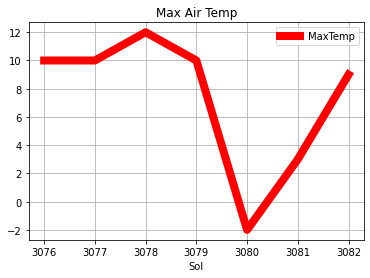

In [107]:
maxTempGraph = htmlTable.plot(title='Max Air Temp', x = 'Sol', y = 'MaxTemp', grid=True, linewidth=8, color='r')

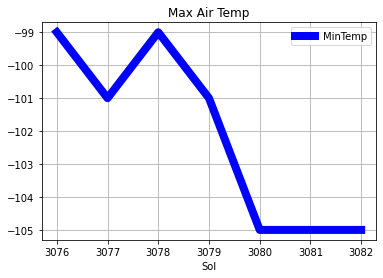

In [108]:
maxTempGraph = htmlTable.plot(title='Min Air Temp', x = 'Sol', y = 'MinTemp', grid=True, linewidth=8, color='b')

In [138]:
x = htmlTable.Sol
y1 = htmlTable.MinTemp
y2 = htmlTable.MaxTemp
width = .5
plt.style.use('fivethirtyeight')
maxPlot = plt.bar(x, y2, color = 'red')
minPlot = plt.bar(x, y1, color = 'skyblue')
plt.ylim([-110, 20])
plt.axhline(0, color = 'black')
plt.xlabel('Sol (Mars Day)', labelpad = 20)
plt.ylabel('Degrees Fahrenheit', labelpad = 20)
plt.title('Mars Weather Data', pad = 20)
plt.bar_label(y1)
plt.bar_label(y2)

AttributeError: module 'matplotlib.pyplot' has no attribute 'bar_label'

In [110]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
